# Neural Networks
Tensor Flow Documentation: https://www.tensorflow.org/ <br>
Iris Data Set Documentation: https://www.kaggle.com/arshid/iris-flower-dataset <br>

## 0. Import Libraries

In [70]:
import pandas as pd
import numpy as np
import requests
import re
import seaborn
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn as sk

from matplotlib import pyplot as plt
from IPython.display import clear_output
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow import keras 
from tensorflow.keras import layers 
from sklearn.metrics import confusion_matrix


## 1. Import and examine Iris data

In [12]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


First we need to delete the column "Id" as this is not a feature

In [13]:
iris.drop('Id',axis=1,inplace=True)

## 2. Transform Iris data into usable forms

### Standardize the feature data
We need to standardize our data since petalwidth is an order of magnitude smaller then the other features

In [18]:
X_data_original = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y_data_original = iris[['Species']]

In [19]:
X_data = preprocessing.scale(X_data_original)

### One hot encode response
Neural Networks do not predict on categorical data, it needs to be nominal.  So we use 1 hot encoding

In [22]:
one_hot = LabelBinarizer()
Y = one_hot.fit_transform(Y_data_original)

## 3. Split data into training and test datasets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.3, random_state=1)

## 4. Define a Neural Network in Tensorflow

### Set Hyperparameters
In OPER 785 you will learn how to tune these parameters

In [64]:
# Hyper-parameters
learning_rate = 0.01
training_epochs = 30
optimizer = "adam"
batches = 32

In [87]:
n_hidden_1 = 16 # 1st layer number of neurons
n_hidden_2 = 8 # 1st layer number of neurons
n_input = X_train.shape[1] # input shape (105, 4)
n_classes = y_train.shape[1] # classes to predict

In [88]:
model = keras.models.Sequential()
model.add(keras.Input(shape=n_input))
model.add(layers.Dense(n_hidden_1,activation="relu"))
model.add(layers.Dense(n_hidden_2,activation="relu"))
model.add(layers.Dense(n_classes, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


Create a helper function that will plot our accuracy and loss every epoch <br>
https://medium.com/geekculture/how-to-plot-model-loss-while-training-in-tensorflow-9fa1a1875a5

In [89]:
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [90]:
callbacks_list = [PlotLearning()]

### Train your Neural Network

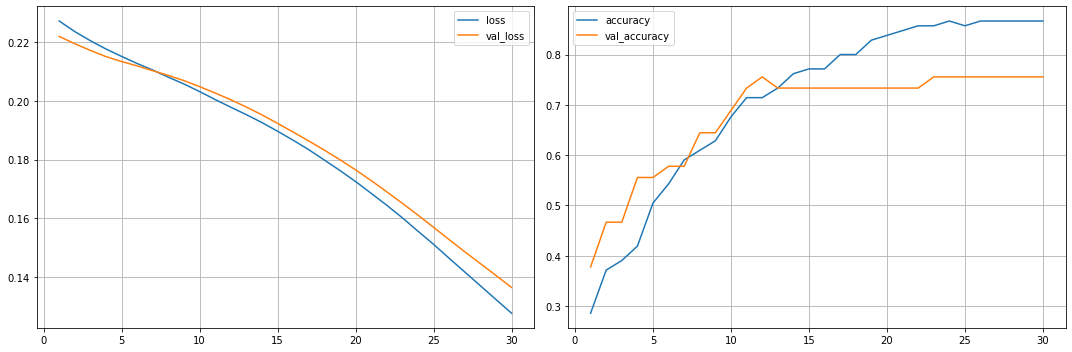

In [91]:
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError(), metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batches, epochs=training_epochs, validation_data=(X_test, y_test),callbacks=callbacks_list)

In [78]:
predictions = model.predict(X_test)
predictions.shape

(45, 3)

In [77]:
y_test.shape

(45, 3)

In [81]:
confusion_matrix(
    y_test.argmax(axis=1), predictions.argmax(axis=1))

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)